# Imports

In [123]:
import pandas as pd 
import numpy  as np

import matplotlib.pyplot as plt
import seaborn           as sns 

from sklearn.linear_model    import LinearRegression, Lasso, Ridge
from sklearn.metrics         import mean_squared_error
from sklearn.model_selection import train_test_split

# Loading Data

In [42]:
real_df = pd.read_csv('kc_house_data.csv')
real_df['date'] = pd.to_datetime(real_df['date'])
real_df.shape

(21613, 21)

In [43]:
real_df.head().T

,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,2014-10-13 00:00:00,2014-12-09 00:00:00,2015-02-25 00:00:00,2014-12-09 00:00:00,2015-02-18 00:00:00
price,221900,538000,180000,604000,510000
bedrooms,3,3,2,4,3
bathrooms,1,2.25,1,3,2
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1,2,1,1,1
waterfront,0,0,0,0,0
view,0,0,0,0,0


In [44]:
real_df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# EDA 

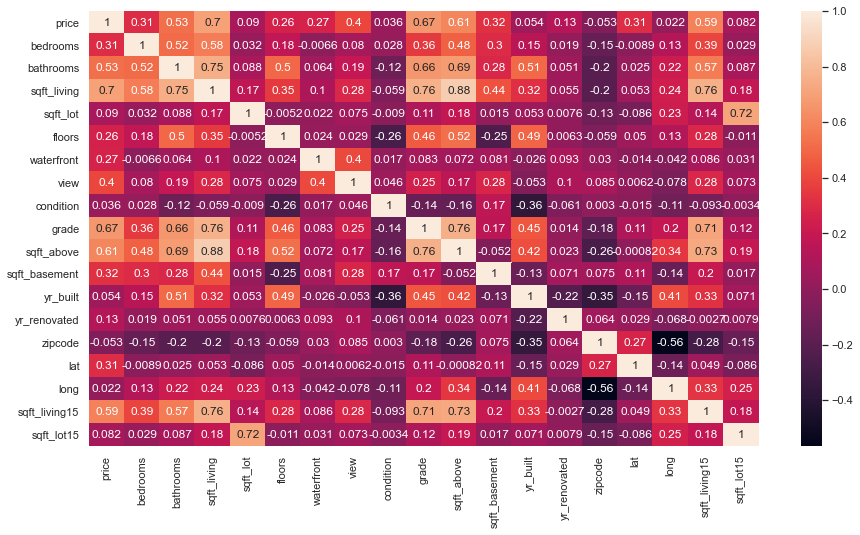

In [49]:
# Correlations between features and target
sns.set(rc={'figure.figsize':(15,8)})
corr = real_df.iloc[:,1:].corr()
sns.heatmap(corr, annot=True)
plt.show()

# Data Preparation 

In [78]:
# Split data
X = real_df.drop(['date', 'price'], axis=1)
y = real_df['price']

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Model Training

In [124]:
# Linear Regression
linreg = LinearRegression()
linreg.fit(X_train,y_train)

# Lasso Regression
lasso = Lasso(alpha=0.8, normalize=True)
lasso.fit(X_train,y_train)

# Ridge Regression
ridge = Ridge(alpha=0.8, normalize=True)
ridge.fit(X_train,y_train)

Ridge(alpha=0.8, normalize=True)

lasso coefficients: [-1.12561750e-06 -3.40120748e+04  4.00782909e+04  1.51803146e+02
  8.35809368e-02  5.07178223e+03  5.42868751e+05  5.51685733e+04
  2.28925516e+04  9.50530397e+04  3.21848776e+01  0.00000000e+00
 -2.58854543e+03  2.16753895e+01 -5.50676560e+02  5.94084530e+05
 -1.93687370e+05  1.60359774e+01 -3.29794421e-01]


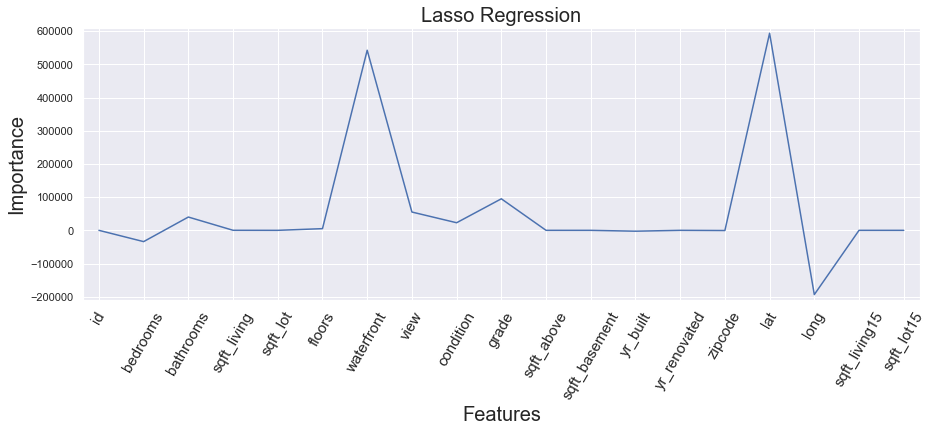

In [93]:
# lasso coefficients
lasso_coef = lasso.coef_
print('lasso coefficients:', lasso_coef)

# Plot coefficients
sns.set(rc={'figure.figsize':(15,5)})
plt.plot(range(len(X_train.columns)), lasso_coef)
plt.xticks(range(len(X_train.columns)), X_train.columns.values, rotation=60)
plt.xlabel('Features', fontsize=20)
plt.ylabel('Importance',fontsize=20)
plt.xticks(fontsize=15)
plt.title('Lasso Regression',fontsize=20)
plt.margins(0.02)
plt.show()

# Performance Metrics

In [109]:
# Absolute Error and Absolute error percentual (ae_aep)
def ae_aep(data):
    data['abs_error'] = np.abs(data['price'] - data['predict'])
    data['abs_error_perc'] = np.abs(data['price'] - data['predict']) / data['price'] *100
    
    return data

# Mean Absolute Error (MAE)
def mae(data):
    mae = np.sum(data['abs_error'])/len(data['abs_error'])
    
    return mae

# Mean Absoulute Percentual Error (MAPE)
def mape(data):
    mape = np.mean(data['abs_error_perc'])
    
    return mape

In [140]:
#                                               TEST METRICS
# Predict
pred_linreg = linreg.predict(X_test)
pred_lasso  = lasso.predict(X_test)
pred_ridge  = ridge.predict(X_test)

# Df for metrics 
df_linreg = pd.DataFrame({'price': y_test, 'predict': pred_linreg})
df_lasso  = pd.DataFrame({'price': y_test, 'predict': pred_lasso})
df_ridge  = pd.DataFrame({'price': y_test, 'predict': pred_ridge})
ae_aep(df_linreg)
ae_aep(df_lasso)
ae_aep(df_ridge)


print('LinReg MAE: ', mae(df_linreg),
    '  Lasso MAE: ',  mae(df_lasso),
 '     Ridge MAE: ',  mae(df_ridge)
     )

print('LinReg MAPE:', mape(df_linreg),
   '   Lasso MAPE:',  mape(df_lasso),
 '     Ridge MAPE:',  mape(df_ridge)
     )

print('LinReg R^2: ', linreg.score(X_test, y_test),
   '   Lasso R^2: ',  lasso.score(X_test, y_test),
'      Ridge R^2: ',  linreg.score(X_test, y_test)
     )

print('LinReg RMSE:', np.sqrt(mean_squared_error(y_test, pred_linreg)),
    '  Lasso RMSE:',  np.sqrt(mean_squared_error(y_test, pred_lasso)),
'      Ridge RMSE:',  np.sqrt(mean_squared_error(y_test, pred_ridge))
     
     )

LinReg MAE:  127454.40369016255   Lasso MAE:  127418.75636691552      Ridge MAE:  130819.23467907183
LinReg MAPE: 25.30292085974848    Lasso MAPE: 25.286403956966932      Ridge MAPE: 25.23457568892407
LinReg R^2:  0.699592626884342    Lasso R^2:  0.699513943852082       Ridge R^2:  0.699592626884342
LinReg RMSE: 208251.69992725836   Lasso RMSE: 208278.9708997423       Ridge RMSE: 228263.74771157966
